In [11]:
import numpy as np 
import pandas as pd

In [12]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv')
print("Input Data")
data.shape

Input Data


(284807, 31)

In [13]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv',sep=',')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [14]:
data.isnull().values.any()

False

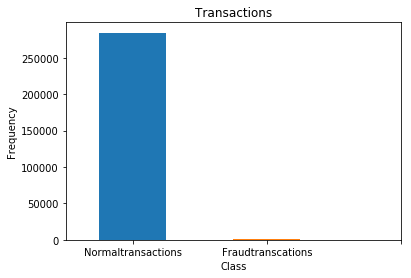

In [15]:
import sklearn
import scipy
import matplotlib.pyplot as plt
labels = ["Normaltransactions", "Fraudtranscations"]
class_count = pd.value_counts(data['Class'], sort = True)#Returns object containing counts of unique values by sorting
class_count.plot(kind = 'bar', rot=0)
plt.title("Transactions")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [16]:
#Check the number of valid transactions in the entire dataset
valid_transactions = data[data['Class']==0]
x= valid_transactions.shape
print("Valid Cases : ", x)

#Check the number of fraud transactions in the entire dataset
fraud_transactions = data[data['Class']==1]
y = fraud_transactions.shape
print("Fraud Cases : ", y)

Valid Cases :  (284315, 31)
Fraud Cases :  (492, 31)


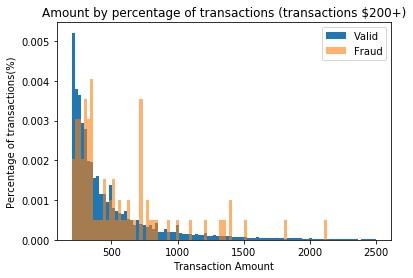

In [17]:
import warnings
warnings.filterwarnings('ignore')
#Plotting the high value transactions
bins = np.linspace(200, 2500, 100)
plt.hist(valid_transactions.Amount, bins, alpha=1, normed=True, label='Valid')
plt.hist(fraud_transactions.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction Amount")
plt.ylabel("Percentage of transactions(%)");
plt.show()

In [18]:
from sklearn.preprocessing import RobustScaler

import time

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)


In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [20]:

scaled_time = data['scaled_time']
scaled_amount = data['scaled_amount']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [21]:
#  For normal distribution of the classes we need to balance the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
valid_data = data.loc[data['Class'] == 0][:492]

normal_distribution = pd.concat([fraud_data, valid_data])

# Shuffle dataframe rows
dist_data = normal_distribution.sample(frac=1, random_state=42)

dist_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
157253,2.989171,0.294729,-1.313818,0.501323,-1.764036,0.009882,2.456576,-1.332141,-1.081612,-3.039396,...,0.163983,-1.324275,0.482911,-2.699568,0.833186,-1.139424,0.387082,0.444764,0.278214,0
6719,-0.293440,-0.896122,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,...,0.632710,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1
231845,0.461119,0.731423,-5.490102,4.680387,-1.331484,0.550215,0.036085,2.546044,-3.814290,-16.258941,...,-3.739646,15.059285,-4.879417,1.703783,-0.310303,1.653012,-0.046962,0.771627,-0.276068,0
243393,-0.307273,0.789765,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,...,-0.551121,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,1
68067,6.957312,-0.374511,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,...,1.230278,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,1


Distribution of the Classes after the sub sampling dataset
1    0.5
0    0.5
Name: Class, dtype: float64


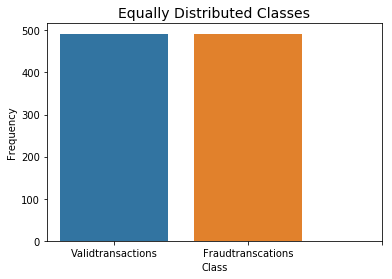

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Distribution of the Classes after the sub sampling dataset')
print(dist_data['Class'].value_counts()/len(dist_data))

labels = ["Validtransactions", "Fraudtranscations"]

sns.countplot('Class', data=dist_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()

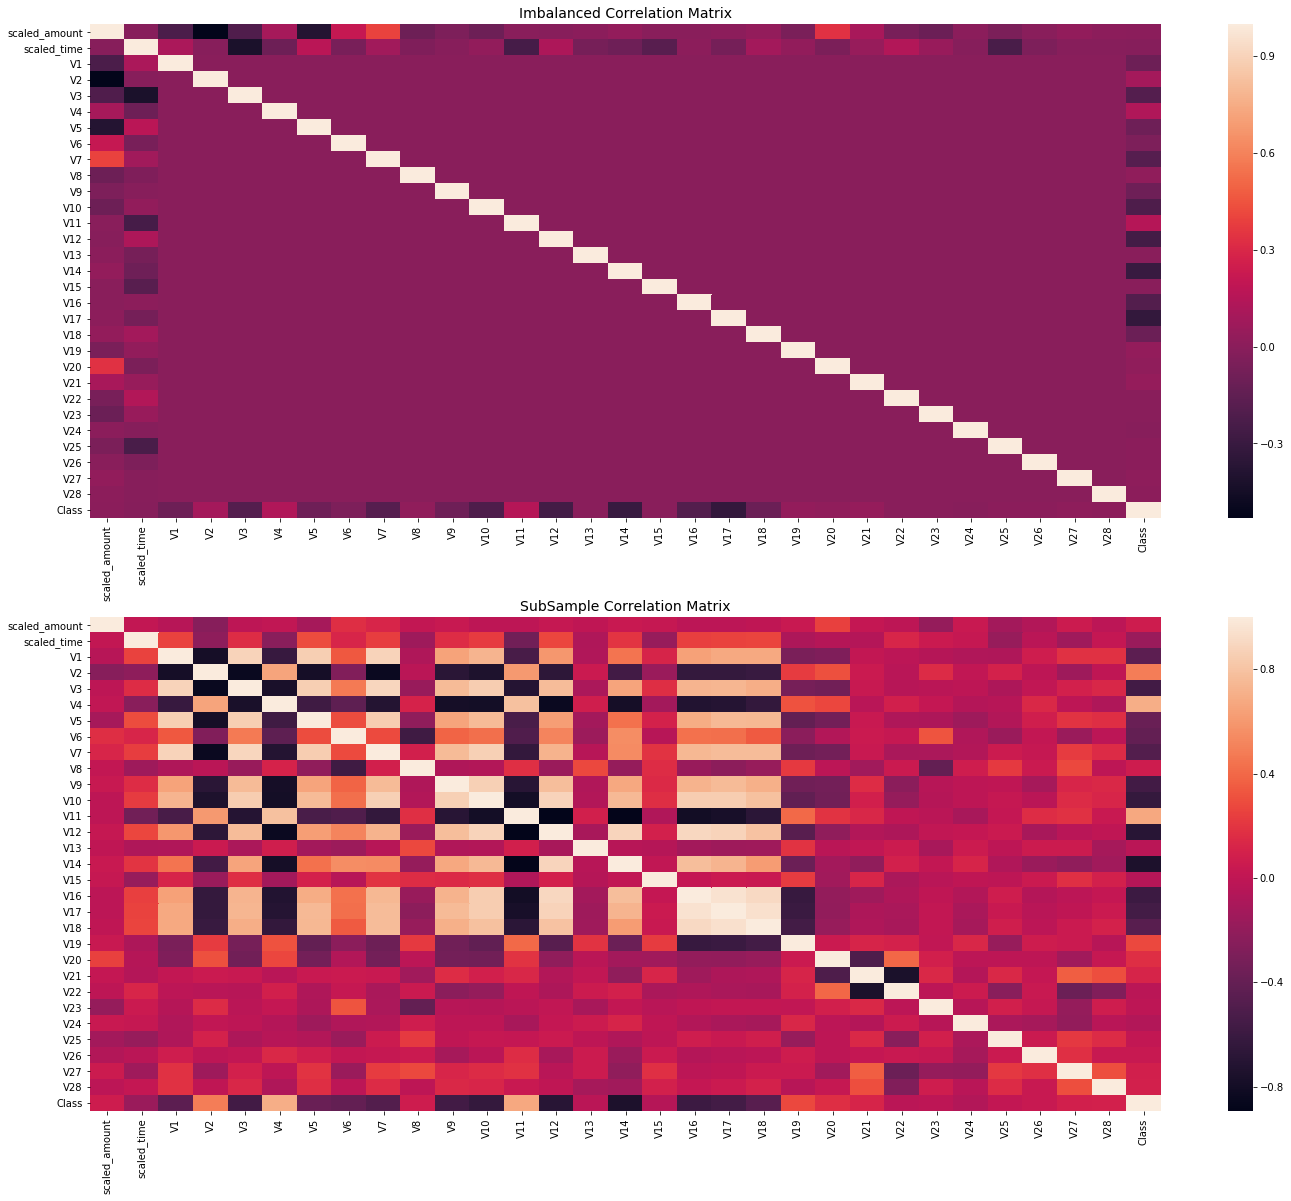

In [23]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
correlation = data.corr()
sns.heatmap(correlation, ax=axis1)
axis1.set_title("Imbalanced Correlation Matrix", fontsize=14)


subsamp_correlation = dist_data.corr()
sns.heatmap(subsamp_correlation, ax=axis2)
axis2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

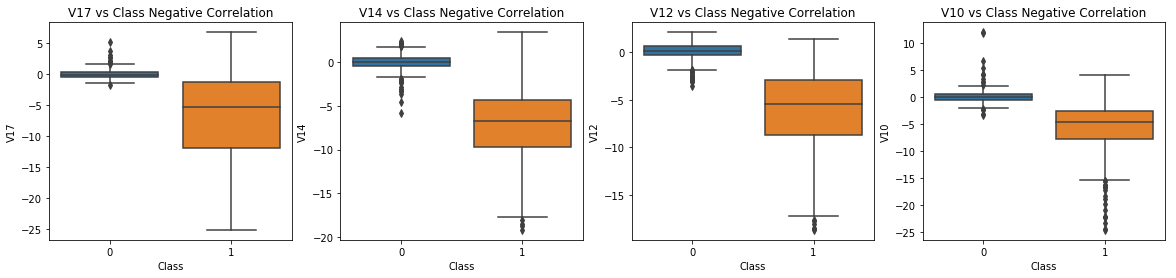

In [24]:
fig, axis = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with the Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=dist_data, ax=axis[0])
axis[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=dist_data, ax=axis[1])
axis[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data= dist_data, ax=axis[2])
axis[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data= dist_data, ax=axis[3])
axis[3].set_title('V10 vs Class Negative Correlation')

plt.show()

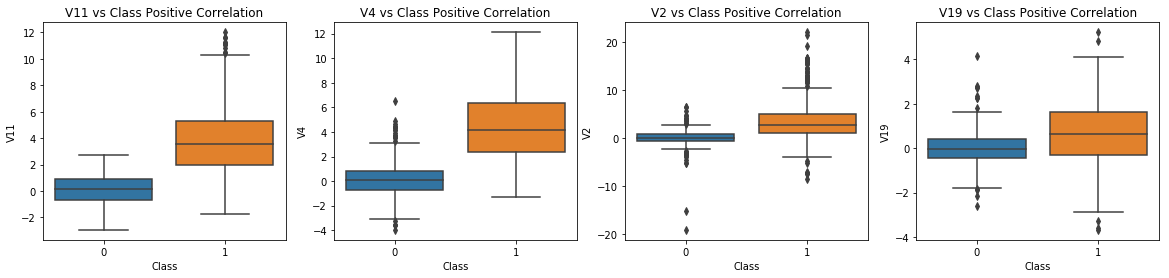

In [25]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=dist_data, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=dist_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=dist_data, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=dist_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [26]:
dist_data.drop(columns= ['V1', 'V3', 'V5', 'V6', 'V8', 'V9', 'V11', 'V13', 'V15', 'V16', 'V18', 'V23', 'V20', 'V21', 'V22', 'V24', 'V25', 'V26','V27','V28'])





,scaled_amount,scaled_time,V2,V4,V7,V10,V12,V14,V17,V19,Class
157253,2.989171,0.294729,0.501323,0.009882,-1.081612,-0.988545,-1.732759,1.367933,1.332907,-0.441489,0
6719,-0.293440,-0.896122,4.313523,6.796797,-2.436653,-6.810813,-10.285283,-11.543498,-3.204383,-1.314495,1
231845,0.461119,0.731423,4.680387,0.550215,-3.814290,1.324097,1.205852,0.657074,1.355379,0.621902,0
243393,-0.307273,0.789765,3.329561,3.601720,-4.396859,-3.991785,-6.150187,-8.760695,-6.293479,2.995245,1
68067,6.957312,-0.374511,-1.632441,0.847753,1.448868,-0.150129,-0.795988,0.578869,-0.119204,0.476860,1
122287,1.033885,-0.096206,0.139686,1.118069,0.564365,0.176332,0.863021,0.836328,-0.474344,-0.068969,0
135250,-0.254594,-0.041389,-0.036976,-0.261259,-0.267744,-0.065020,1.181777,0.165590,-0.774433,0.436280,0
223572,-0.293440,0.690116,3.312495,5.036985,-3.449159,-5.653638,-5.883724,-9.266120,-5.709087,-1.556530,1
59180,1.173758,-0.422467,-0.311855,0.180994,-0.211656,0.722157,0.076650,0.019729,-0.483426,0.156794,0
129592,-0.146720,-0.065132,-0.649616,0.063094,-0.727350,0.577073,-0.472993,-0.143567,0.495026,-0.738277,0


In [27]:
# Undersampling before cross validating (prone to overfit)
features = dist_data.drop('Class', axis=1)
label = dist_data['Class']
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = x_train.values
X_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [28]:
#importing the required libraries
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [41]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV,RandomizedSearchCV

def train_test_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    
    print("\nAccuracy Scores on Train data")
    print("Accuracy score:", accuracy_score(y_train, y_pred))
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))
    
    
    print("\nAccuracy Scores on Cross validation data")
    y_pred_cv = cross_val_predict(model,x_train,y_train,cv=5)
    print("F1 Score: ", f1_score(y_train,y_pred_cv))
    print("Precision Score: ", precision_score(y_train,y_pred_cv))
    print("Recall Score: ", recall_score(y_train,y_pred_cv))



    print("\nAccuracy Scores on Test data")
    y_pred_test = model.predict(x_test)
    print("\nAccuracy score:", accuracy_score(y_test, y_pred_test))
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(10,4))
    gs = gridspec.GridSpec(1,2)

    axis1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Train Data")

    axis3 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Test Data")


Accuracy Scores on Train data
Accuracy score: 0.9479034307496823
F1 Score:  0.9446693657219973
Precision Score:  0.9749303621169917
Recall Score:  0.9162303664921466

Accuracy Scores on Cross validation data
F1 Score:  0.932975871313673
Precision Score:  0.9560439560439561
Recall Score:  0.9109947643979057

Accuracy Scores on Test data

Accuracy score: 0.9390862944162437
F1 Score:  0.9439252336448598
Precision Score:  0.9711538461538461
Recall Score:  0.9181818181818182


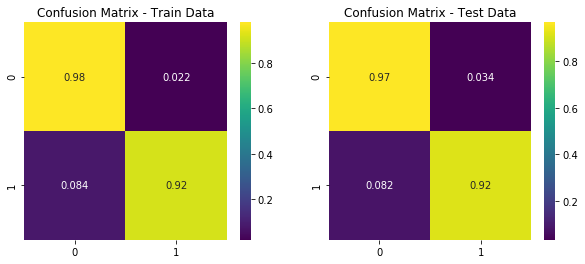

In [42]:
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

#Applying Linear regression model
log_reg = LogisticRegression()

train_test_model(log_reg, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.951715374841169
F1 Score:  0.9483695652173914
Precision Score:  0.9858757062146892
Recall Score:  0.9136125654450262

Accuracy Scores on Cross validation data
F1 Score:  0.9272237196765499
Precision Score:  0.9555555555555556
Recall Score:  0.900523560209424

Accuracy Scores on Test data

Accuracy score: 0.9390862944162437
F1 Score:  0.9433962264150944
Precision Score:  0.9803921568627451
Recall Score:  0.9090909090909091


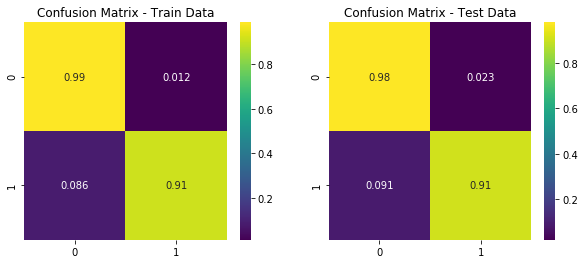

In [45]:
svc_clf = SVC(kernel='linear', degree=3,shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None)

train_test_model(svc_clf, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.9542566709021602
F1 Score:  0.9518716577540107
Precision Score:  0.9726775956284153
Recall Score:  0.9319371727748691

Accuracy Scores on Cross validation data
F1 Score:  0.927807486631016
Precision Score:  0.9480874316939891
Recall Score:  0.9083769633507853

Accuracy Scores on Test data

Accuracy score: 0.9289340101522843
F1 Score:  0.9326923076923076
Precision Score:  0.9897959183673469
Recall Score:  0.8818181818181818


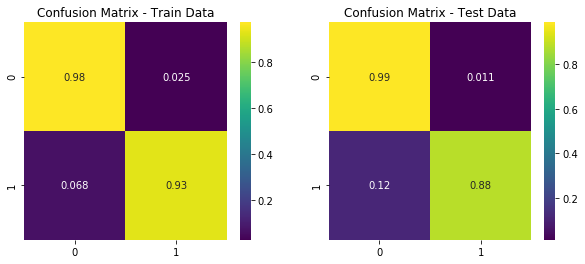

In [46]:
knn_clf = KNeighborsClassifier(n_neighbors =3, metric='minkowski')
train_test_model(knn_clf, x_train, x_test, y_train, y_test)


